<a href="https://colab.research.google.com/github/VuDucCong18/Work-Project/blob/main/Sentiment_Analysis_On_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Sentiment Analysis & Booking Conversion Project
This project applies Natural Language Processing (NLP) and Machine Learning (ML) to analyze customer sentiment in restaurant reviews and its impact on booking conversion rates. The goal is to uncover data-driven insights that help Hungry Hub optimize restaurant partnerships, improve marketing strategies, and enhance customer experience.

**What This Codebook Covers:**

Data Preprocessing & Cleaning – Handling missing values, removing spam, and translating Thai reviews.

Sentiment Classification – Utilizing a fine-tuned DistilBERT model to categorize reviews as positive, neutral, or negative.

Conversion Rate Analysis – Measuring how sentiment correlates with customer booking behaviors.

Segment Analysis & Insights – Identifying restaurant groups based on sentiment and conversion trends.

Strategic Recommendations – Providing data-backed suggestions to improve restaurant performance.

**Machine Learning & Statistical Techniques Used:**

BERT-based Sentiment Analysis – Predicting sentiment scores for customer reviews.

Feature Engineering & Text Processing – Removing duplicates, detecting bots, and standardizing text.

Segmentation Analysis – Grouping restaurants into 9 key segments based on sentiment and conversion.

Quartile-Based Analysis – Assigning sentiment labels based on aggregated sentiment scores.

Correlation & Trend Analysis – Investigating how restaurant ratings (food, service, ambiance, value) relate to sentiment and conversions.

**Important Notes Before Running the Code:**

🚀 GPU Recommended – The sentiment classification model (DistilBERT) is computationally intensive. Enable GPU runtime to speed up processing.

⏳ Execution Time – Some processes, such as sentiment classification and segment mapping, may take 10-15 minutes depending on dataset size.

🔗 API Limitations – The Google Translate API for Thai-to-English translation requires Google Cloud credits. A pre-translated dataset is provided to bypass API constraints.

# Phase 1: Data Preprocessing & Multilingual Review Standardization

**Description:** In this phase, we focus on cleaning and preparing the review dataset to ensure consistency and usability. This includes:

1. Filtering out unusable data – Dropping null, NaN, and empty reviews to maintain data integrity.

2. Standardizing language – Translating Thai reviews to English for uniform sentiment analysis.

3. Ensuring data completeness – Refining the dataset to include only meaningful and interpretable customer feedback.

In [ ]:
import pandas as pd
import glob

# Define the folder path
folder_path = "/content/drive/My Drive/Data Analytic in Asia/full_sets_of_data_reviews/"

# Use glob to get all CSV files in the folder
csv_files = glob.glob(folder_path + "*.csv")

# Initialize an empty list to store DataFrames
df_list = []

# Loop through each file and read it
for file in csv_files:
    try:
        df = pd.read_csv(file, encoding="utf-8", low_memory=False, dtype=str)  # Read as string to avoid type issues
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding="ISO-8859-1", low_memory=False, dtype=str)  # Fallback encoding

    df_list.append(df)  # Append DataFrame to list

# Concatenate all DataFrames into one
df = pd.concat(df_list, ignore_index=True)

# Display the shape of the final DataFrame
print("Final DataFrame shape:", df.shape)

# Display the first 5 rows
print(df.head())

# From the shape, it has learnt that we have 273218 review records from 2016 - 2024

Final DataFrame shape: (273218, 32)
  id user_id reservation_id                                           review  \
0  1    3708          28565  amazing food as always. love the salmon rolls.    
1  2    3708          26028                                              NaN   
2  3    3708          28624                                              NaN   
3  5    5127          26816                                              NaN   
4  6    3708          28797                                        Great !\n   

  rating           created_at           updated_at state occasion featured  \
0      5  2016-02-23 06:58:46  2021-11-12 10:54:15   1.0      NaN        0   
1      5  2016-02-24 10:58:08  2021-11-12 10:54:15   1.0      NaN        0   
2      4  2016-02-24 11:13:07  2021-11-12 10:54:15   1.0      NaN        0   
3      3  2016-03-01 03:22:40  2021-11-12 10:54:15   1.0      NaN        0   
4      4  2016-03-01 13:16:15  2021-11-12 10:54:15   1.0      NaN        0   

   ... review_

In [ ]:
# To only keep the relevant columns (the first 7 columns) and the column 16th for restarant id and drop the non relevant columns
df_selected = df.iloc[:, list(range(7)) + [16]]

df_selected.tail()

,id,user_id,reservation_id,review,rating,created_at,updated_at,restaurant_id
273213,281704,63271,6732978,พนักงานบริการดีมาก บรรยากาศในร้านดี เมนูที่เลื...,5,2024-12-30 10:05:12,2024-12-30 10:07:42,NaN
273214,281705,213327,6735805,NaN,4,2024-12-30 10:05:20,2024-12-30 10:06:01,3905
273215,281706,NaN,6689923,NaN,5,2024-12-30 10:06:25,2024-12-30 10:06:25,NaN
273216,281707,230464,6743266,NaN,5,2024-12-30 10:07:23,2024-12-30 10:07:23,NaN
273217,281708,NaN,6518952,NaN,5,2024-12-30 10:24:34,2024-12-30 10:24:34,NaN


In [ ]:
df_selected.info()

#The information has shown that not all of reviews have an indicated restaurant_id, hence, we should drop those reviews that has no restaurant_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273218 entries, 0 to 273217
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              273218 non-null  object
 1   user_id         205822 non-null  object
 2   reservation_id  271834 non-null  object
 3   review          127239 non-null  object
 4   rating          271834 non-null  object
 5   created_at      273218 non-null  object
 6   updated_at      273218 non-null  object
 7   restaurant_id   254163 non-null  object
dtypes: object(8)
memory usage: 16.7+ MB


In [ ]:
# Drop any rows that contains NAN, null or empty values for analysis
import numpy as np
df_selected = df_selected.replace(r'^\s*$', np.nan, regex=True)  # Convert empty strings to NaN
df_selected = df_selected.dropna(how='any')  # Drop rows with NaN in any column
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105040 entries, 0 to 273201
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              105040 non-null  object
 1   user_id         105040 non-null  object
 2   reservation_id  105040 non-null  object
 3   review          105040 non-null  object
 4   rating          105040 non-null  object
 5   created_at      105040 non-null  object
 6   updated_at      105040 non-null  object
 7   restaurant_id   105040 non-null  object
dtypes: object(8)
memory usage: 7.2+ MB


In [ ]:
# Let's start to translate Thai to English for Sentiment Analysis by installing google translate package/library
#!pip3 install googletrans==3.1.0a0

**Note 1:**
Translating Thai Reviews to English
There are two main ways to translate Thai text to English:

1. googletrans (Free, Slow, Unofficial)

Uses Google's unofficial API (can be rate-limited).
Slow (~1-2 sec per row).
Best for small datasets (<1,000 rows).


2. Google Cloud Translation API (Fast, Official)

Uses Google’s official API (secure & scalable).
Very fast (~1000 rows in 10-15 sec).
Best for large datasets (10,000+ rows).

🔹In this project, we are highly recommendation to use Google Cloud API for fast & reliable translations.

In [ ]:
# Method 1
#import googletrans
#from googletrans import *

#translator = googletrans.Translator()


# Translate Thai language to English

# Change review column data type to string
#df_selected['review'][:100] = df_selected['review'][:100].astype(str)


# Apply translation only for non-English reviews
#df_selected['translated_review1'] = df_selected['review'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))

# Display translated reviews
#df_selected[['review', 'translated_review1']].head(30)


In [ ]:
#pip install google-cloud-translate

In [ ]:
#import the API JSON file in your drive path
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/My Drive/Data Analytic in Asia/data-analytic-in-asia-7929f923b518.json"

In [ ]:
# Method 2
import pandas as pd
import re
from google.cloud import translate_v2 as translate
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm  # Import tqdm for progress tracking

# Initialize Google Translate Client
translate_client = translate.Client()

# Function to detect Thai text
def is_thai(text):
    """Returns True if the text contains Thai characters, otherwise False."""
    return bool(re.search("[ก-๙]", str(text)))  # Checks if there are Thai characters

# Function to translate Thai text only
def translate_text(text):
    """Translates Thai text to English. If text is already English, returns it unchanged."""
    if pd.isna(text) or text.strip() == "":  # Skip empty or NaN values
        return text
    if not is_thai(text):  # If it's already in English, return it as is
        return text
    try:
        translated_text = translate_client.translate(text, target_language="en")["translatedText"]
        return translated_text
    except Exception as e:
        print(f"Translation error for text: {text}\nError: {e}")
        return text  # Return original if translation fails

# Function to batch translate Thai reviews with progress tracking
def batch_translate(texts):
    """Translates only Thai reviews using 10 parallel requests, with tqdm progress bar."""
    results = []
    with ThreadPoolExecutor(max_workers=10) as executor:
        for result in tqdm(executor.map(translate_text, texts), total=len(texts), desc="Translating Reviews"):
            results.append(result)
    return results

# Apply translation directly to df_selected
df_selected["review_translated"] = df_selected["review"]  # Create new column directly

# Identify Thai reviews
thai_mask = df_selected["review"].apply(is_thai)

# Translate only the Thai reviews using 10 parallel workers with progress tracking
df_selected.loc[thai_mask.index[thai_mask], "review_translated"] = pd.Series(
    batch_translate(df_selected.loc[thai_mask.index[thai_mask], "review"]),
    index=thai_mask.index[thai_mask]
)

# Show first 30 rows for verification
df_selected[['review', 'review_translated']].head(30)

Streaming output truncated to the last 5000 lines.
Error: ('invalid_grant: Invalid grant: account not found', {'error': 'invalid_grant', 'error_description': 'Invalid grant: account not found'})
Translation error for text: จองที่ 8 ที่ แต่ให้ไปนั่งโต๊ะที่จัดไว้ 6 ที่ พอแจ้งพนักงานไป ก็มีการชักสีหน้า บริการไม่ดีเลย ต้องเรียกกันหลายรอบกว่าจะได้อะไรสักอย่าง พนักงานสาขานี้ควรปรับปรุงการให้บริการเป็นอย่างมาก อาหารดีแต่บริการไม่ดีค่ะ
Error: ('invalid_grant: Invalid grant: account not found', {'error': 'invalid_grant', 'error_description': 'Invalid grant: account not found'})
Translation error for text: เพื่อนทานซุปเหลือเศษ1ส่วน4ถ้วย พนักงานบอกจะขอปรับ เก็บราคาเต็ม งงมาก แต่สุดท้ายก็ไม่ปรับ แต่ก็ไม่น่าจะพูดเพราะเสียความรู้สึกมาก อาหารไม่เหมือนในบทความ พิซซ่าหน้าเครื่องน้อยมาก ชีสก็ไม่ยืดเหมือนในรูป 
Error: ('invalid_grant: Invalid grant: account not found', {'error': 'invalid_grant', 'error_description': 'Invalid grant: account not found'})
Translation error for text: ชอบนะรสชาติกลางๆอาหารประ

KeyboardInterrupt: 

**Note 2:**
Current Performance and Limitations


[1] First attempt: it took 13 mins

[2] Second attempt: it took 12 mins

[3] Third attempt: it took 15 mins

The main constraints come from:

Google Translate API Rate Limits – The API allows only 10 parallel requests at a time, which limits the speed of translation.

Network Latency – Each API request introduces some delay, especially when processing large batches.

Memory Usage – Storing and processing large datasets in memory can slow down execution and increase the risk of crashes.

Single-Threaded Processing for Some Parts – While translation runs in parallel, other operations like checking for Thai text still run sequentially, adding to the overall execution time.

If the dataset grows to 200,000+ records, processing time will increase proportionally, making real-time or near-instant translation infeasible with the current approach. Alternative methods may be needed to improve efficiency

**Note 3**: Due to API limitations and the constraints of the free trial package, we can only translate Thai to English using the Google Cloud API if we have available credits. Since translation incurs charges beyond the free usage limit, we implemented a **workaround** by pre-translating the Thai reviews, saving them into a CSV file, and then importing the translated data back into the Colab notebook for further analysis.

In [ ]:
#This code is used to download the translated reviews into a CSV file in case the API does not work
#df_selected.to_csv("translated_reviews.csv", index=False, encoding="utf-8-sig")

In [ ]:
# Import required libraries
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Path
file_path = "/content/drive/My Drive/Data Analytic in Asia/translated_reviews.csv"

# Step 3: Check if the File Exists
if os.path.exists(file_path):
    print("File found! Loading...")
else:
    print("File not found! Please check the file path.")

# Step 4: Load CSV into DataFrame (Handling UTF-8 Encoding for Thai Language)
df_selected = pd.read_csv(file_path, encoding='utf-8-sig')

# Step 5: Display First 5 Rows
print("First 5 rows of the dataset:")
print(df_selected.head())

# Step 6: Display Data Types for Validation
print("Data Types Information:")
print(df_selected.info())

# Step 7: Summary Statistics (Optional)
print("Summary Statistics:")
print(df_selected.describe(include='all'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading...
First 5 rows of the dataset:
   id  user_id  reservation_id  \
0   1     3708           28565   
1   6     3708           28797   
2   8       32           29452   
3  20     3708           27207   
4  21     3708           22920   

                                            review  rating  \
0  amazing food as always. love the salmon rolls.        5   
1                                        Great !\n       4   
2                                 Awesome \n\n\n\n       5   
3          Best salad in town: Skinny Sumo Salad!!       5   
4                                 Best pork ribs!!       5   

            created_at           updated_at  restaurant_id  year  \
0  2016-02-23 06:58:46  2021-11-12 10:54:15             24  2016   
1  2016-03-01 13:16:15  2021-11-12 10:54:15            472  2016   
2  2016-03-08 08:12:37  2021-11-12 10

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105040 entries, 0 to 105039
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 105040 non-null  int64 
 1   user_id            105040 non-null  int64 
 2   reservation_id     105040 non-null  int64 
 3   review             105040 non-null  object
 4   rating             105040 non-null  int64 
 5   created_at         105040 non-null  object
 6   updated_at         105040 non-null  object
 7   restaurant_id      105040 non-null  int64 
 8   year               105040 non-null  int64 
 9   review_translated  105040 non-null  object
dtypes: int64(6), object(4)
memory usage: 8.0+ MB


# Phase 2: Text-Preprocessing & Feature Engineering
**Description:** This phase focuses on cleaning, filtering, and standardizing review data to enhance its usability for sentiment analysis and machine learning models. By removing spam, irrelevant content, and normalizing text, we ensure that only high-quality, meaningful reviews are used for insights.

**2.1 Detect & Remove Spam, Bot and Irrelevant Reviews**

In [ ]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=833913b9f541df5b849c58b6595bdf6dd85f1d813218f102fab20bbce0e77427
  Stored in directory: /root/.cache/pip/wheels/b9/c6/5a/829298789e94348b81af52ab42c19d49da007306bbcc983827
Successfully built pandarallel


In [ ]:
import pandas as pd
import re
from pandarallel import pandarallel

# Enable parallel processing
pandarallel.initialize(progress_bar=True)

# Compile regex patterns for faster lookup
spam_keywords = ["test", "lorem ipsum", "generated by", "auto-reply", "spam", "fake"]
url_pattern = re.compile(r"https?://\S+|www\.\S+")  # Detects URLs
numeric_pattern = re.compile(r"^\d+$")  # Detects reviews that contain only numbers

# Step 1: Detect Duplicate Reviews Across Users (Same User, Same Day, >3 Times)
def detect_duplicate_reviews(df):
    """Flags reviews that appear more than 3 times from the same user on the same day."""
    duplicate_counts = df.groupby(["user_id", "review_translated", "created_at"]).size()
    duplicate_reviews = duplicate_counts[duplicate_counts > 3].index
    return df.set_index(["user_id", "review_translated", "created_at"]).index.isin(duplicate_reviews)

# Step 2: Refined Spam Detection
def detect_spam(review):
    """Detects bot-generated or spam-like reviews."""

    if pd.isna(review) or review.strip() == "":  # Check for NaN or empty values
        return True

    review = review.lower().strip()  # Normalize text

    # 1️. Check if the review contains any spam keywords
    if any(keyword in review for keyword in spam_keywords):
        return True

    # 2️. Detect suspicious links (potential promo/spam content)
    if url_pattern.search(review):
        return True

    # 3️. Detect reviews containing only numbers
    if numeric_pattern.match(review):
        return True

    return False  # If none of the spam conditions are met, return False (not spam)

# Apply spam filtering
df_selected["is_duplicate"] = detect_duplicate_reviews(df_selected)
df_selected["is_spam"] = df_selected["review_translated"].parallel_apply(detect_spam)

# Remove spam and duplicate reviews
df_selected_filtered = df_selected[(df_selected["is_spam"] == False) & (df_selected["is_duplicate"] == False)]
df_selected_filtered = df_selected_filtered.drop(columns=["is_spam", "is_duplicate"])

# Display results
print(df_selected_filtered[["review_translated"]].head(30))


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


                                    review_translated
0     amazing food as always. love the salmon rolls. 
1                                           Great !\n
2                                    Awesome \n\n\n\n
3             Best salad in town: Skinny Sumo Salad!!
4                                    Best pork ribs!!
5                   Perfect place for hosting events!
6                               Great Vietnamese food
7                        Best hot chocolate ever!!!! 
8   Wonderful food & amazing customer focus ! \n\n...
9   Tasty food, especially the Moroccan cuisine wa...
10                                        Great tapas
12                                Very good service. 
13                                    good and smooth
14  Amazing food! What a great discovery through H...
15  Their Thai food was amazing! The best Massaman...
16                                 superb as always\n
17  Truly enjoyable experience in a comfortable 'h...
18  Amazing food!! Best Mexi

**Note 4: Explanation of the Filters in 2.1**

*Step 1: Detect Duplicate Reviews Across Users*

Flags reviews that appear more than 3 times from the same user on the same day.
Prevents spam bots or fake reviewers from copy-pasting the same review multiple times.

*Step 2: Rule-Based Spam Detection*

Bot/Test Reviews: Removes reviews with spam keywords ("test", "auto-reply", "lorem ipsum").

Reviews containing only numbers are now flagged as spam ("123123", "9999")

Suspicious Promotional Links: Flags reviews containing URLs (www.something.com), often used in fake promotions.

In [ ]:
#From 105040 records, we have cleaned down to 104823 that are likely to be authentic reviews
# We detected that 217 reviews are likely to be "Bot" or "Spam" reviews
df_selected_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104823 entries, 0 to 105039
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 104823 non-null  int64 
 1   user_id            104823 non-null  int64 
 2   reservation_id     104823 non-null  int64 
 3   review             104823 non-null  object
 4   rating             104823 non-null  int64 
 5   created_at         104823 non-null  object
 6   updated_at         104823 non-null  object
 7   restaurant_id      104823 non-null  int64 
 8   year               104823 non-null  int64 
 9   review_translated  104823 non-null  object
dtypes: int64(6), object(4)
memory usage: 8.8+ MB


In [ ]:
#Testing
#df_selected_filtered[df_selected_filtered['translated_review'].str.contains('Really good')]

df_selected_filtered[df_selected_filtered['review_translated'].str.contains('Testttt')]

,id,user_id,reservation_id,review,rating,created_at,updated_at,restaurant_id,year,review_translated


**2.2 Standardise and Normalise Text**

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 13.6 MB/s eta 0:00:00


In [ ]:
import re
import contractions
import pandas as pd

def clean_text(text):
    """Cleans and standardizes text while keeping sentence structure for sentiment analysis."""

    if pd.isna(text) or text.strip() == "":
        return ""  # Handle empty or NaN values

    text = text.lower().strip()

    # Expand contractions (e.g., "can't" → "cannot")
    text = contractions.fix(text)

    # Remove newline characters and excess whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Remove special characters & numbers, keeping only letters and spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Normalize elongated characters ("soooo" → "soo")
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)

    return text

# Apply text cleaning
df_selected_filtered["cleaned_review"] = df_selected_filtered["review_translated"].apply(clean_text)

# Drop rows with non-English content using regex: keep only rows with English letters and spaces
# If cleaned review contains anything else (e.g., Thai script), remove it
english_regex = re.compile(r'^[a-zA-Z\s]+$')
df_selected_filtered = df_selected_filtered[df_selected_filtered["cleaned_review"].apply(lambda x: bool(english_regex.match(x)))]

# Display sample
print(df_selected_filtered[["review_translated", "cleaned_review"]].head(20))

                                    review_translated  \
0     amazing food as always. love the salmon rolls.    
1                                           Great !\n   
2                                    Awesome \n\n\n\n   
3             Best salad in town: Skinny Sumo Salad!!   
4                                    Best pork ribs!!   
5                   Perfect place for hosting events!   
6                               Great Vietnamese food   
7                        Best hot chocolate ever!!!!    
8   Wonderful food & amazing customer focus ! \n\n...   
9   Tasty food, especially the Moroccan cuisine wa...   
10                                        Great tapas   
12                                Very good service.    
13                                    good and smooth   
14  Amazing food! What a great discovery through H...   
15  Their Thai food was amazing! The best Massaman...   
16                                 superb as always\n   
17  Truly enjoyable experience 

**Note 5: Explanation of the Normalisation in 2.2**

Removes \n (newline characters) → Converts multi-line text into a single clean sentence.

Remove rows that is not in English or English translated reviews

Converts text to lowercase → Standardizes text for consistent processing.

Expands contractions ("can't" → "cannot", "it's" → "it is").

Removes excessive whitespace → Ensures proper sentence spacing.

Removes special characters & numbers → Keeps only meaningful words.

Normalizes letter elongation ("sooo good" → "so good").


# Phase 3: Sentiment Classification & Aggregation

**Desciption:** In this phase, we employ a DistilBERT deep learning model to classify customer reviews based on sentiment. By analyzing the textual data, the model assigns positive and negative sentiment scores to each review, allowing us to derive meaningful insights into customer perception.

In [ ]:
pip install transformers torch tqdm pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import pandas as pd
import numpy as np
from tqdm import tqdm

# Enable tqdm for progress tracking
tqdm.pandas()

# Load DistilBERT Model & Tokenizer for Sentiment Analysis
MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Move model to GPU if available for faster inference
device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(device)

# Function for Batch Sentiment Classification (Returns Sentiment Labels & Scores)
def classify_sentiment_batch(texts):
    """Predicts sentiment for a batch of reviews."""

    # Tokenize batch of texts at once (efficient processing)
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Extract sentiment labels & scores
    sentiment_labels = []
    positive_scores = []
    negative_scores = []

    for prob in probabilities:
        negative_score = prob[0].item()
        positive_score = prob[1].item()

        # Store values
        positive_scores.append(positive_score)
        negative_scores.append(negative_score)

        # Assign sentiment labels based on positive score
        if positive_score > 0.6:
            sentiment_labels.append(1)  # Positive
        elif 0.4 <= positive_score <= 0.6:
            sentiment_labels.append(0)  # Neutral
        else:
            sentiment_labels.append(-1)  # Negative

    return sentiment_labels, positive_scores, negative_scores

# Apply Sentiment Classification in Batches
batch_size = 32
reviews = df_selected_filtered["cleaned_review"].tolist()

# Process in batches
sentiment_labels = []
positive_scores = []
negative_scores = []

for i in tqdm(range(0, len(reviews), batch_size), desc="Processing Sentiment Batches"):
    batch = reviews[i : i + batch_size]
    batch_labels, batch_pos_scores, batch_neg_scores = classify_sentiment_batch(batch)

    sentiment_labels.extend(batch_labels)
    positive_scores.extend(batch_pos_scores)
    negative_scores.extend(batch_neg_scores)

# Store Results in DataFrame
df_selected_filtered["sentiment_label"] = sentiment_labels
df_selected_filtered["positive_score"] = positive_scores
df_selected_filtered["negative_score"] = negative_scores

# Display Sample Results
print(df_selected_filtered[["cleaned_review", "sentiment_label", "positive_score", "negative_score"]].head(20))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Processing Sentiment Batches: 100%|██████████| 3265/3265 [07:39<00:00,  7.10it/s]


                                       cleaned_review  sentiment_label  \
0        amazing food as always love the salmon rolls                1   
1                                              great                 1   
2                                             awesome                1   
3                best salad in town skinny sumo salad                1   
4                                      best pork ribs                1   
5                    perfect place for hosting events                1   
6                               great vietnamese food                1   
7                             best hot chocolate ever                1   
8   wonderful food  amazing customer focus  best n...                1   
9   tasty food especially the moroccan cuisine was...                1   
10                                        great tapas                1   
12                                  very good service                1   
13                                    

**Note 6: Current Performance of DistilBERT(Deep Learning Model)**

[1] First Attempt: 7 mins

[2] Second Attempt: 7 mins

Note that, it must be ran by GPU for such performance. CPU may take much much longer and it is not recommended to run by CPU

**Note 7: DistilBert Model Evaluation**


In [ ]:
#export the first 100 reviews and manually label them with the correct sentiment label
#manual_validation_df = df_selected_filtered['cleaned_review'].head(100)
#manual_validation_df.to_csv('manual_validation.csv', index=False)

In [ ]:
#Import back the labelled_validation_df
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Path
file_path = "/content/drive/My Drive/Data Analytic in Asia/labelled_manual_validation.csv"

# Step 3: Check if the File Exists
if os.path.exists(file_path):
    print("File found! Loading...")
else:
    print("File not found! Please check the file path.")

# Step 4: Load CSV into DataFrame (Handling UTF-8 Encoding for Thai Language)
labelled_manual_validation_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Step 5: Display First 5 Rows
print("First 5 rows of the dataset:")
print(labelled_manual_validation_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading...
First 5 rows of the dataset:
                                 cleaned_review  true_label
0  amazing food as always love the salmon rolls           1
1                                        great            1
2                                       awesome           1
3          best salad in town skinny sumo salad           1
4                                best pork ribs           1


In [ ]:
#Checking
labelled_manual_validation_df['true_label'].count()

np.int64(100)

Accuracy: 0.90


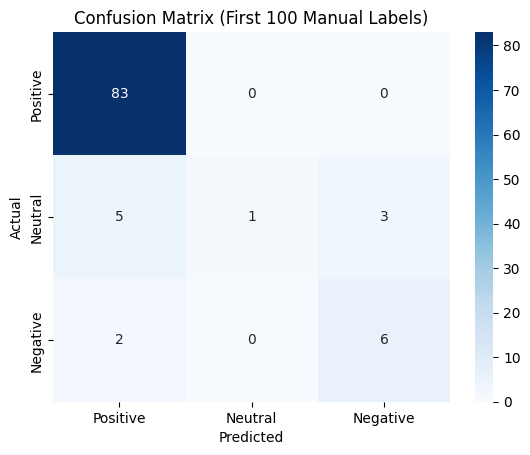


 Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.75      0.71         8
     Neutral       1.00      0.11      0.20         9
    Positive       0.92      1.00      0.96        83

    accuracy                           0.90       100
   macro avg       0.86      0.62      0.62       100
weighted avg       0.91      0.90      0.87       100



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Extract first 100 predicted reviews (matching order of manual labels)
predicted_100 = df_selected_filtered[["cleaned_review", "sentiment_label"]].reset_index(drop=True).iloc[:100]

# Step 2: Add unique index for merge alignment
labelled_manual_validation_df = labelled_manual_validation_df.reset_index().rename(columns={"index": "manual_id"})
predicted_100 = predicted_100.reset_index().rename(columns={"index": "manual_id"})

# Step 3: Merge using unique index to avoid duplicates
merged_validation = pd.merge(labelled_manual_validation_df, predicted_100, on="manual_id")

# Step 4: Define true and predicted labels
y_true = merged_validation["true_label"]
y_pred = merged_validation["sentiment_label"]

# Step 5: Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=[1, 0, -1])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Positive", "Neutral", "Negative"],
            yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (First 100 Manual Labels)")
plt.show()

# Step 7: Classification Report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"]))

1. High Accuracy (90%)
The model accurately classified 90 out of 100 reviews, showing strong general performance, especially for positive sentiment.

2. Excellent at Detecting Positive Sentiment
With an F1-score of 0.96 and recall of 1.00, the model is highly effective in identifying positive reviews, which make up the majority of the dataset.

3. Weak Neutral Sentiment Detection
The model struggles with neutral reviews (F1-score: 0.20, recall: 0.11), often misclassifying them as either positive or negative—suggesting ambiguity or class imbalance.

4. Moderate Performance on Negative Sentiment
Negative reviews are identified with decent accuracy (F1-score: 0.71), though further improvements can be made with more balanced data.

In [ ]:
df_selected_filtered.groupby('sentiment_label')['id'].count()

,id
sentiment_label,
-1,19094
0,658
1,84702


sentiment_label
 1    84702
-1    19094
 0      658
Name: count, dtype: int64


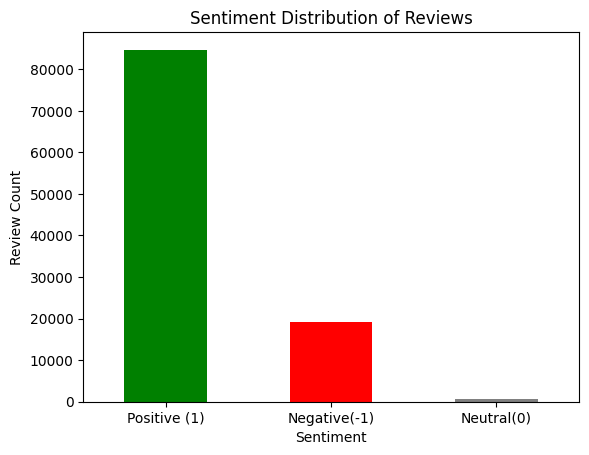

In [ ]:
# Count reviews by sentiment category
sentiment_counts = df_selected_filtered["sentiment_label"].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind="bar", color=["green", "red", "grey"])
plt.xticks(ticks=[0,1,2], labels=["Positive (1)", "Negative(-1)", "Neutral(0)"], rotation=0)
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()


# Phase 4: Restaurant Segmentation & Attribute Enrichment

**Description:** In this phase, we group, segment, and enrich restaurant data using sentiment scores, conversion rates, and key customer ratings. By structuring the data into meaningful segments, we aim to uncover insights that help identify business opportunities and areas for improvement.


In [ ]:
df_selected_filtered['restaurant_id'].nunique()

3000

In [ ]:
# This code is to check that each restaurant_id can contain more than 1 review. Therefore, we need to groupby the restaurant_review to find average_aggregated sentiment score for each restaurant
# For example, there are more than 4 reviews that reviews for restaurant_id 10
df_selected_filtered[df_selected_filtered['restaurant_id'] == 10]

,id,user_id,reservation_id,review,rating,created_at,updated_at,restaurant_id,year,review_translated,cleaned_review,sentiment_label,positive_score,negative_score
15910,55738,12494,536782,อาหารโดยรวมรสชาติปานกลาง\n*ไม่สามารถใช้คูปองส่...,2,2020-08-02 03:09:53,2023-04-19 16:34:47,10,2020,"Overall, the food tastes average. *Discount co...",overall the food tastes average discount coupo...,-1,0.008424,0.991576
18119,64092,36652,585013,เป็น บุฟเฟ่ต์ โรงแรม ที่ทำเนื้อแกะได้อร่อยมาก ...,5,2020-09-26 14:12:37,2021-11-12 10:54:15,10,2020,It&#39;s a hotel buffet that makes very delici...,its a hotel buffet that makes very delicious l...,1,0.999822,0.000178
52532,74361,258296,725777,อาหารอร่อยค่ะ,5,2021-01-29 13:45:45,2023-04-19 16:34:46,10,2021,The food is delicious.,the food is delicious,1,0.999881,0.000119
54353,78409,284244,771841,บริการdddddddมากกก,5,2021-03-07 14:09:39,2021-11-12 10:54:15,10,2021,Very good servicedddddddd,very good servicedd,1,0.999780,0.000220


In [ ]:
#This is to check if the restaurant contains a good number of reviews
df_selected_filtered.groupby('restaurant_id')['id'].count().sort_values(ascending=False)

,id
restaurant_id,
933,3496
837,2196
1575,1845
423,1401
424,1349
...,...
4981,1
5265,1
5276,1


In [ ]:
review_counts = df_selected_filtered.groupby('restaurant_id')['id'].count()
num_restaurants_10_plus = (review_counts >= 10).sum()
print("Number of restaurants with 10 or more reviews:", num_restaurants_10_plus)

Number of restaurants with 10 or more reviews: 1123


In [ ]:
# Step 1: Count reviews per restaurant
review_counts = df_selected_filtered.groupby('restaurant_id')['id'].count()

# Step 2: Filter for restaurants with 10 or more reviews
valid_restaurants = review_counts[review_counts >= 10].index

# Step 3: Filter the original DataFrame
filtered_df = df_selected_filtered[df_selected_filtered['restaurant_id'].isin(valid_restaurants)]

# Step 4: Group and compute average sentiment score
analysis_df = filtered_df.groupby('restaurant_id', as_index=False)['positive_score'].mean()
analysis_df = analysis_df.rename(columns={"positive_score": "avg_sentiment_score"})

# View top 10 results
analysis_df.head(10)


,restaurant_id,avg_sentiment_score
0,13,0.254131
1,22,0.944407
2,33,0.887464
3,34,0.809278
4,36,0.881296
5,63,0.871775
6,76,0.912590
7,90,0.923022
8,168,0.915267
9,169,0.714167


**Note 8: Steps to Determine Sentiment Thresholds and check the range of aggregated_score**

Since aggregated_score = positive_score - negative_score, the range typically falls between -1 (fully negative) to +1 (fully positive).
Calculate Distribution Metrics

Mean (μ) and Standard Deviation (σ) of aggregated_score to understand sentiment spread.
Use percentiles (25th, 50th, 75th, 90th) to classify sentiment.
Define Reasonable Sentiment Categories

High Sentiment: Scores above 75th percentile or μ + 0.5σ.

Neutral Sentiment: Scores between 25th to 75th percentile.

Low Sentiment: Scores below 25th percentile or μ - 0.5σ

In [ ]:
import numpy as np

# Compute Mean and Standard Deviation
mean_sentiment = np.mean(analysis_df["avg_sentiment_score"])
std_sentiment = np.std(analysis_df["avg_sentiment_score"])

# Compute Key Percentiles
percentiles = np.percentile(analysis_df["avg_sentiment_score"], [25, 50, 75])

# Print Thresholds
print(f"Sentiment Score Distribution Analysis:")
print(f"Mean Sentiment Score: {mean_sentiment:.4f}")
print(f"Standard Deviation: {std_sentiment:.4f}")
print(f"25th Percentile (Low Sentiment Threshold): {percentiles[0]:.4f}")
print(f"50th Percentile (Neutral Benchmark): {percentiles[1]:.4f}")
print(f"75th Percentile (High Sentiment Threshold): {percentiles[2]:.4f}")

Sentiment Score Distribution Analysis:
Mean Sentiment Score: 0.8175
Standard Deviation: 0.1140
25th Percentile (Low Sentiment Threshold): 0.7610
50th Percentile (Neutral Benchmark): 0.8336
75th Percentile (High Sentiment Threshold): 0.9003


In [ ]:
import plotly.express as px

# Create an interactive boxplot using Plotly
fig = px.box(
    analysis_df,
    y="avg_sentiment_score",
    points="all",
    title="Interactive Distribution of Average Sentiment Scores by Restaurant",
    labels={"avg_sentiment_score": "Avg Sentiment Score"},
    hover_data={"avg_sentiment_score": True}
)

# Improve aesthetics
fig.update_layout(
    title_x=0.5,
    yaxis=dict(title="Avg Sentiment Score", showgrid=True),
    template="plotly_white"
)

# Show the interactive plot
fig.show()

In [ ]:
# Calculate quartiles for categorizing sentiment scores
q1 = analysis_df["avg_sentiment_score"].quantile(0.25)  # 25th percentile
q3 = analysis_df["avg_sentiment_score"].quantile(0.75)  # 75th percentile

# Define sentiment labels based on quartiles
def categorize_sentiment(score):
    if score >= q3:
        return "High Sentiment"
    elif score <= q1:
        return "Low Sentiment"
    else:
        return "Neutral Sentiment"

# Apply function to create new column
analysis_df["sentiment_label"] = analysis_df["avg_sentiment_score"].apply(categorize_sentiment)

analysis_df.head(10)

NameError: name 'analysis_df' is not defined

**Note 9: Importing the Conversion Rate of Each Restaurant CSV Using Total GMV in 2024**

In [ ]:
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Path
file_path = "/content/drive/My Drive/Data Analytic in Asia/total_number_of_bookings.csv"

# Step 3: Check if the File Exists
if os.path.exists(file_path):
    print("File found! Loading...")
else:
    print("File not found! Please check the file path.")

# Step 4: Load CSV into DataFrame (Handling UTF-8 Encoding for Thai Language)
CR_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Step 5: Display First 5 Rows
print("First 5 rows of the dataset:")
print(CR_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading...
First 5 rows of the dataset:
   restaurant_id  booking_count
0             33           7581
1             34            321
2            168            309
3            222           7932
4            238              2


# 📊 Benchmarking High-Performing Restaurants on Hungry Hub (2023)

## Objective
Define a threshold for high-performing restaurants using actual 2023 data without assumptions.

---

## Key Metrics (from 2023 data)
- **Total revenue generated:** 700 million baht  
- **Average spend per customer:** >1,000 baht  
- **Estimated bookings:**  
  `700,000,000 ÷ 1,000 ≈ 700,000 bookings`
- **Daily bookings across platform:**  
  `700,000 ÷ 365 ≈ 1,918 bookings/day`
- **Restaurant partners:** 1,400  
- **Average per restaurant:**  
  `1,918 ÷ 1,400 ≈ 1.4 bookings/day`

---

## High-Performing Benchmark

Using Pareto Principle (Top 10% capture ~30% of bookings):

- **Top 10% = 140 restaurants**
- **30% of 1,918 = 575 bookings/day**
- **Per top restaurant:**  
  `575 ÷ 140 ≈ 4.1 bookings/day`

### Threshold for High Performance: **≥ 4 bookings/day**

---

## Summary Table

| Category               | Bookings/Day |
|------------------------|--------------|
| Average Restaurant     | ~1.4/day     |
| High-Performing (Top)  | **≥ 4/day**  |

---


In [ ]:
import numpy as np

# Step 1: Calculate daily booking count
CR_df['daily_booking_count'] = round(CR_df['booking_count'] / 365, 2)

# Step 2: Define fixed thresholds
def categorize_conversion(x):
    if x >= 4:
        return 'High Conversion'
    elif x >= 1.4:
        return 'Medium Conversion'
    else:
        return 'Low Conversion'

# Step 3: Apply categorization
CR_df['conversion_label'] = CR_df['daily_booking_count'].apply(categorize_conversion)

# Step 4: Preview results
print(CR_df[['restaurant_id', 'daily_booking_count', 'conversion_label']].head(10))

   restaurant_id  daily_booking_count   conversion_label
0             33                20.77    High Conversion
1             34                 0.88     Low Conversion
2            168                 0.85     Low Conversion
3            222                21.73    High Conversion
4            238                 0.01     Low Conversion
5            273                 1.89  Medium Conversion
6            280                24.04    High Conversion
7            423                20.20    High Conversion
8            424                 4.35    High Conversion
9            425                22.33    High Conversion


In [ ]:
import plotly.express as px

# Simple box plot for daily booking count (no category color)
fig = px.box(
    CR_df,
    y="daily_booking_count",
    points="all",
    title=" Distribution of Daily Booking Count per Restaurant",
    labels={"daily_booking_count": "Daily Booking Count"},
    hover_data=["restaurant_id"]
)

fig.update_layout(
    title_x=0.5,
    yaxis=dict(title="Daily Booking Count", showgrid=True),
    template="plotly_white"
)

fig.show()

In [ ]:
# Merge sentiment scores with conversion rates using an outer join
merged_df = analysis_df.merge(CR_df, on='restaurant_id', how='outer')

# Display the first few rows of the merged dataframe
print(merged_df.head(10))
# To view the shape of the merged_df
merged_df.shape

   restaurant_id  avg_sentiment_score    sentiment_label  booking_count  \
0             13             0.254131      Low Sentiment            NaN   
1             22             0.944407     High Sentiment            NaN   
2             33             0.887464  Neutral Sentiment         7581.0   
3             34             0.809278  Neutral Sentiment          321.0   
4             36             0.881296  Neutral Sentiment            NaN   
5             63             0.871775  Neutral Sentiment            NaN   
6             76             0.912590     High Sentiment            NaN   
7             90             0.923022     High Sentiment            NaN   
8            168             0.915267     High Sentiment          309.0   
9            169             0.714167      Low Sentiment            NaN   

   daily_booking_count conversion_label  
0                  NaN              NaN  
1                  NaN              NaN  
2                20.77  High Conversion  
3     

(2632, 6)

In [ ]:
# To filter away restaurants that do not have enough info on either sentiment or conversion rate
filtered_df = merged_df[merged_df.notna().all(axis=1)]
filtered_df.head()

,restaurant_id,avg_sentiment_score,sentiment_label,booking_count,daily_booking_count,conversion_label
2,33,0.887464,Neutral Sentiment,7581.0,20.77,High Conversion
3,34,0.809278,Neutral Sentiment,321.0,0.88,Low Conversion
8,168,0.915267,High Sentiment,309.0,0.85,Low Conversion
12,222,0.810739,Neutral Sentiment,7932.0,21.73,High Conversion
16,273,0.790204,Neutral Sentiment,691.0,1.89,Medium Conversion


**Note 10:**
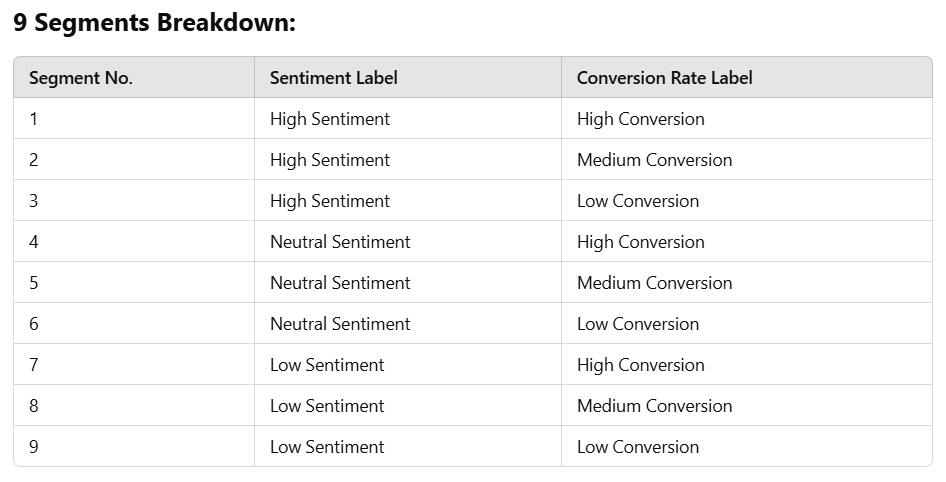

In [ ]:
# Define a mapping function to assign segment labels
def assign_segment_label(row):
    return f"Segment {segment_mapping[(row['sentiment_label'], row['conversion_label'])]} ({row['sentiment_label']}, {row['conversion_label']})"

# Create a dictionary to map combinations to segment numbers
segment_mapping = {
    ('High Sentiment', 'High Conversion'): 1,
    ('High Sentiment', 'Medium Conversion'): 2,
    ('High Sentiment', 'Low Conversion'): 3,
    ('Neutral Sentiment', 'High Conversion'): 4,
    ('Neutral Sentiment', 'Medium Conversion'): 5,
    ('Neutral Sentiment', 'Low Conversion'): 6,
    ('Low Sentiment', 'High Conversion'): 7,
    ('Low Sentiment', 'Medium Conversion'): 8,
    ('Low Sentiment', 'Low Conversion'): 9
}

# Apply the function to create the new segment column
filtered_df['segment_category'] = filtered_df.apply(assign_segment_label, axis=1)

# Display the updated DataFrame
filtered_df.head()

<ipython-input-28-df254f1088b6>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,restaurant_id,avg_sentiment_score,sentiment_label,booking_count,daily_booking_count,conversion_label,segment_category
2,33,0.887464,Neutral Sentiment,7581.0,20.77,High Conversion,"Segment 4 (Neutral Sentiment, High Conversion)"
3,34,0.809278,Neutral Sentiment,321.0,0.88,Low Conversion,"Segment 6 (Neutral Sentiment, Low Conversion)"
8,168,0.915267,High Sentiment,309.0,0.85,Low Conversion,"Segment 3 (High Sentiment, Low Conversion)"
12,222,0.810739,Neutral Sentiment,7932.0,21.73,High Conversion,"Segment 4 (Neutral Sentiment, High Conversion)"
16,273,0.790204,Neutral Sentiment,691.0,1.89,Medium Conversion,"Segment 5 (Neutral Sentiment, Medium Conversion)"


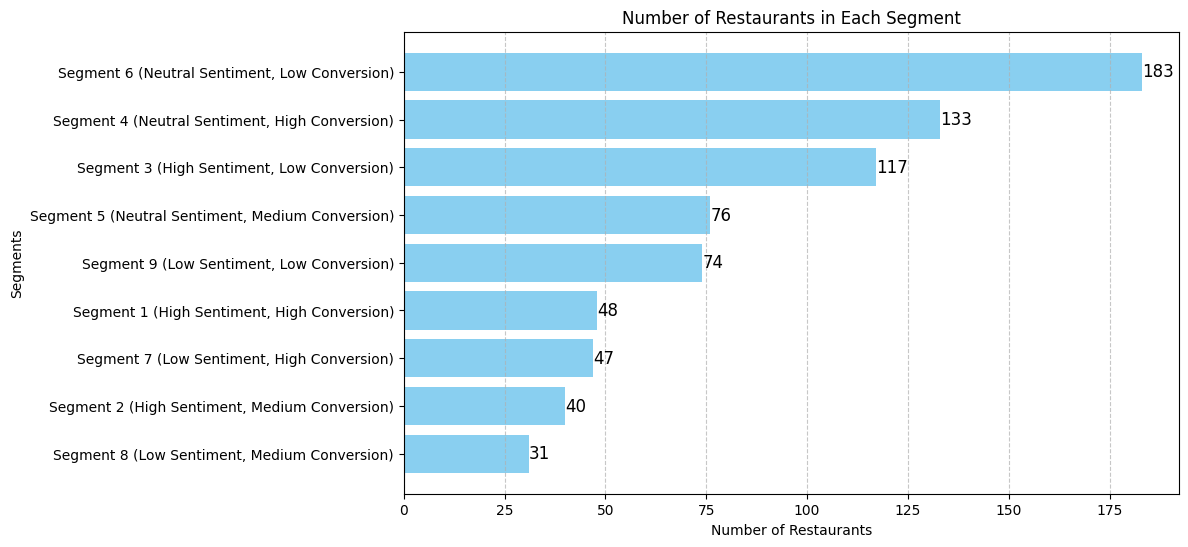

In [ ]:
import matplotlib.pyplot as plt

# Count the number of restaurants in each segment
segment_counts = filtered_df["segment_category"].value_counts().sort_values()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(segment_counts.index, segment_counts.values, color="#89CFF0")  # Baby blue color

# Add labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), ha='left', va='center', fontsize=12)

# Labels and title
plt.xlabel("Number of Restaurants")
plt.ylabel("Segments")
plt.title("Number of Restaurants in Each Segment")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Show plot
plt.show()

**Note 11: Importing 4 Key Rating Per Restaurant**

In [ ]:
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Path
file_path = "/content/drive/My Drive/Data Analytic in Asia/Four_Rating_Review_Data.csv"

# Step 3: Check if the File Exists
if os.path.exists(file_path):
    print("File found! Loading...")
else:
    print("File not found! Please check the file path.")

# Step 4: Load CSV into DataFrame (Handling UTF-8 Encoding for Thai Language)
rating_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Step 5: Display First 5 Rows
print("First 5 rows of the dataset:")
print(rating_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading...
First 5 rows of the dataset:
     id  one_star  two_star  three_star  four_star  five_star  total  average  \
0  4605         0         0           0          8         73     81      4.9   
1  4606         1         0          11         21         80    113      4.6   
2  4607         1         2           8         21         89    121      4.6   
3  4608         1         6          24         78        248    357      4.6   
4  4609         0         6          37        108        585    736      4.7   

   restaurant_id  branch_id           created_at           updated_at  \
0            168        NaN  2023-09-26 11:10:55  2024-12-29 14:36:14   
1            447        NaN  2023-09-26 11:10:56  2024-12-23 08:15:46   
2            273        NaN  2023-09-26 11:10:58  2024-11-08 16:33:53   
3            565        NaN  2023-09-26 

In [ ]:
#only keep the restaurant_id and the four rating
rating_filtered = rating_df[['restaurant_id', 'overall_food', 'overall_ambience', 'overall_service', 'overall_value']]
rating_filtered.head()

,restaurant_id,overall_food,overall_ambience,overall_service,overall_value
0,168,4.7,4.8,4.8,4.7
1,447,4.4,4.4,4.2,4.4
2,273,4.3,4.6,4.7,4.3
3,565,4.4,2.8,2.8,4.3
4,222,4.4,4.6,4.7,4.4


In [ ]:
# Perform an outer join between filtered_df and rating_filtered on 'restaurant_id'
final_df = filtered_df.merge(rating_filtered, on='restaurant_id', how='left')

#Replace 0 rating to np because it can skew the result
final_df[['overall_food', 'overall_ambience', 'overall_service', 'overall_value']] = \
final_df[['overall_food', 'overall_ambience', 'overall_service', 'overall_value']].replace(0.0, np.nan)


#Create a new column called "overall_rating" that take it the means of all 4 key attributes
final_df['average_overall_rating'] = final_df[['overall_food', 'overall_ambience', 'overall_service', 'overall_value']].mean(axis=1)

# Display the first few rows of the final DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   restaurant_id           749 non-null    int64  
 1   avg_sentiment_score     749 non-null    float64
 2   sentiment_label         749 non-null    object 
 3   booking_count           749 non-null    float64
 4   daily_booking_count     749 non-null    float64
 5   conversion_label        749 non-null    object 
 6   segment_category        749 non-null    object 
 7   overall_food            731 non-null    float64
 8   overall_ambience        728 non-null    float64
 9   overall_service         728 non-null    float64
 10  overall_value           731 non-null    float64
 11  average_overall_rating  731 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 70.3+ KB


In [ ]:
#final_df.to_csv("final_df.csv", index=False, encoding="utf-8-sig")

We have total of 2588 restaunrants that have all 4 key rating and sentiment score and conversion rate, 415 restaurants do not have 4 key ratings.

# Phase 5: In-Depth Segment Analysis & Actionable Insights

**Description:** In this phase, we analyze each restaurant segment in-depth by examining sentiment, conversion rates, and customer ratings. We then derive major insights to help HungryHub identify business opportunities, optimize restaurant strategies, and enhance customer satisfaction

In [ ]:
final_df.groupby('segment_category').agg(
    overall_food=('overall_food', 'mean'),
    overall_ambience=('overall_ambience', 'mean'),
    overall_service=('overall_service', 'mean'),
    overall_value=('overall_value', 'mean'),
    average_overall_rating=('average_overall_rating', 'mean'),
    num_restaurants=('restaurant_id', 'count')  # Count unique restaurants in each segment
).sort_values(by='average_overall_rating', ascending=False)  # Sort AFTER aggregation

,overall_food,overall_ambience,overall_service,overall_value,average_overall_rating,num_restaurants
segment_category,,,,,,
"Segment 1 (High Sentiment, High Conversion)",4.708333,4.756250,4.804167,4.741667,4.752604,48
"Segment 2 (High Sentiment, Medium Conversion)",4.747500,4.715000,4.792500,4.755000,4.752500,40
"Segment 3 (High Sentiment, Low Conversion)",4.727679,4.717117,4.765766,4.749107,4.740402,117
"Segment 4 (Neutral Sentiment, High Conversion)",4.557143,4.548120,4.588722,4.566165,4.565038,133
"Segment 5 (Neutral Sentiment, Medium Conversion)",4.584211,4.496053,4.578947,4.571053,4.557566,76
"Segment 6 (Neutral Sentiment, Low Conversion)",4.580233,4.427647,4.499412,4.582558,4.521948,183
"Segment 7 (Low Sentiment, High Conversion)",4.340426,4.300000,4.374468,4.319149,4.333511,47
"Segment 8 (Low Sentiment, Medium Conversion)",4.364516,4.212903,4.212903,4.335484,4.281452,31
"Segment 9 (Low Sentiment, Low Conversion)",4.329167,4.141667,4.183333,4.286111,4.235069,74


In [ ]:
filtered_df.to_csv('filtered_output.csv', index=False)